Why use autocorrelation instead of autocovariance when examining stationary time series?

Autocorrelation values are between 1 and -1 so it can be considered normalized autocovariance.  Additionally, we do not need to worry about units or magnitude when calculating autocorrelation.

Provide an example that if the cov(X,Y)=0, the two random variables, X and Y, are not necessarily independent.

Assume a random variable X with a distribution centered around 0.  Then E[X] = 0.  We then define random variable Y as Y = X^2.  Since Y is defined by X they are not independent.  However,
cov(X,Y) = E[XY]-E[X]E[Y] = E[X * X^2]-E[X]E[Y] = E[X^3]-0 * E[Y] = E[X^3] = 0.

(from an online solution - I need to make sure to study this proof.)


Fit an appropriate ARIMA model on the following datasets in R.  Provide supporting evidence.
faithful
JohnsonJohnson
sunspot.month

In [2]:
library(forecast)
f <- ts(faithful[,2])


Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 6.2 



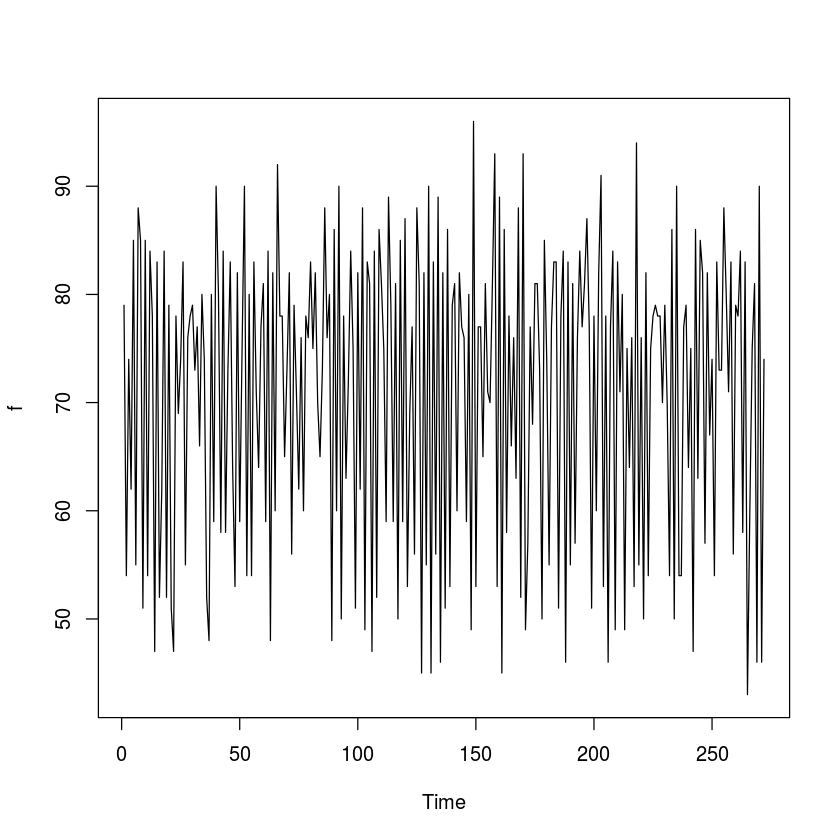

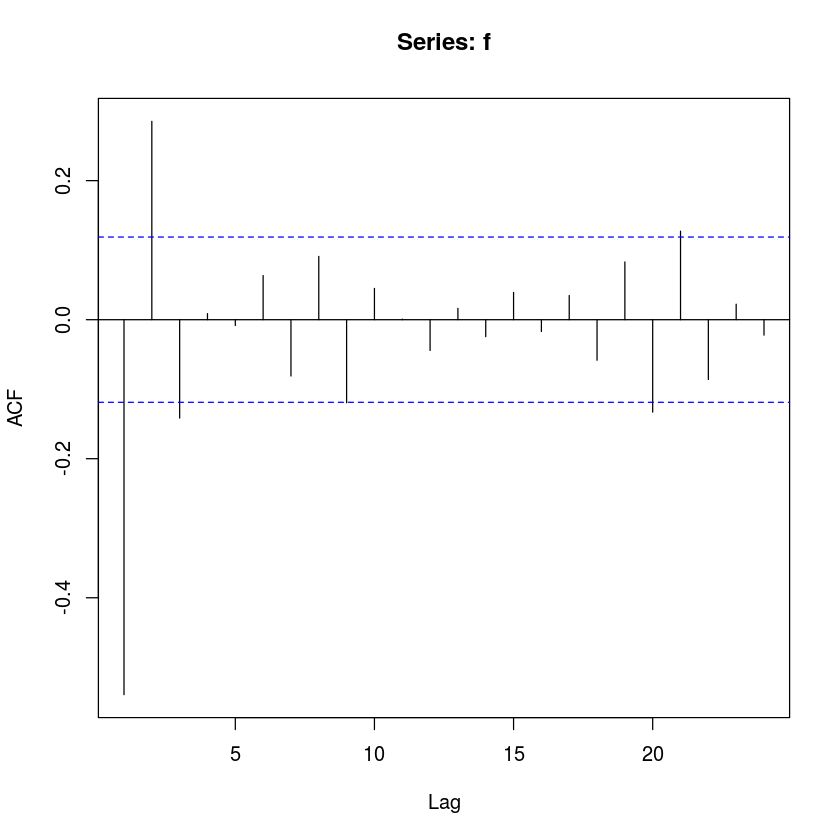

[1] 0

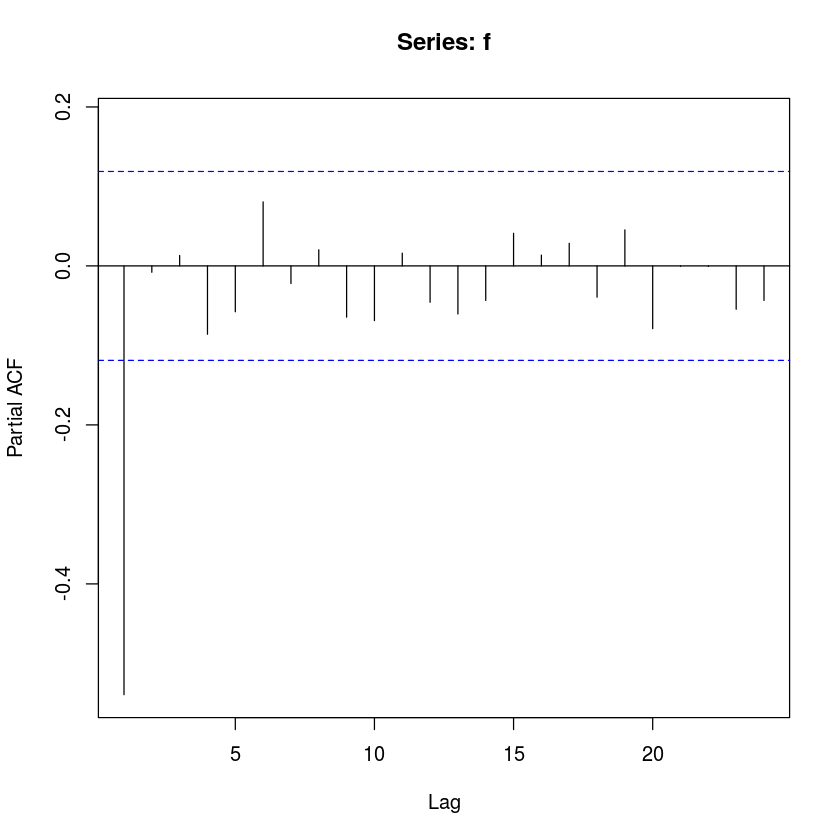

In [3]:
plot(f)
abline(a=0, b=0)
Acf(f)
Pacf(f)
ndiffs(f)

In [4]:
f.fit <- auto.arima(f)

In [5]:
summary(f.fit)

Series: f 
ARIMA(1,0,0) with non-zero mean 

Coefficients:
          ar1  intercept
      -0.5382    70.8826
s.e.   0.0509     0.4509

sigma^2 estimated as 130.5:  log likelihood=-1048.62
AIC=2103.24   AICc=2103.33   BIC=2114.05

Training set error measures:
                     ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.01137448 11.42323 9.340227 -3.045909 14.44168 0.4551702
                     ACF1
Training set -0.004509464


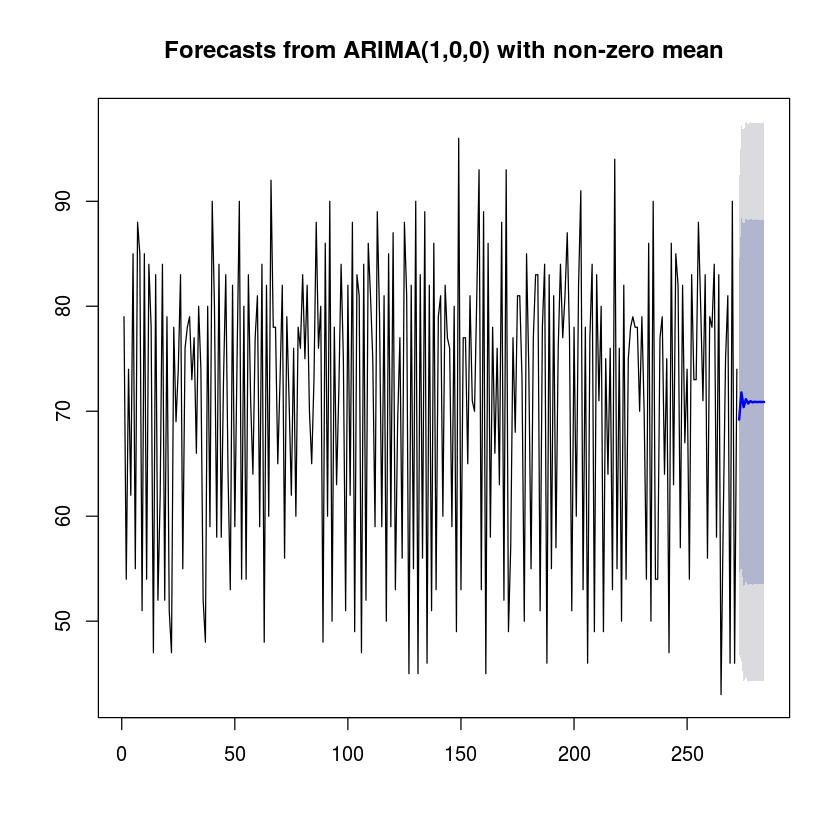

In [6]:
f12 <- forecast(f.fit, 12)
plot(f12)


	Box-Ljung test

data:  residuals(f.fit)
X-squared = 15.14, df = 20, p-value = 0.7683


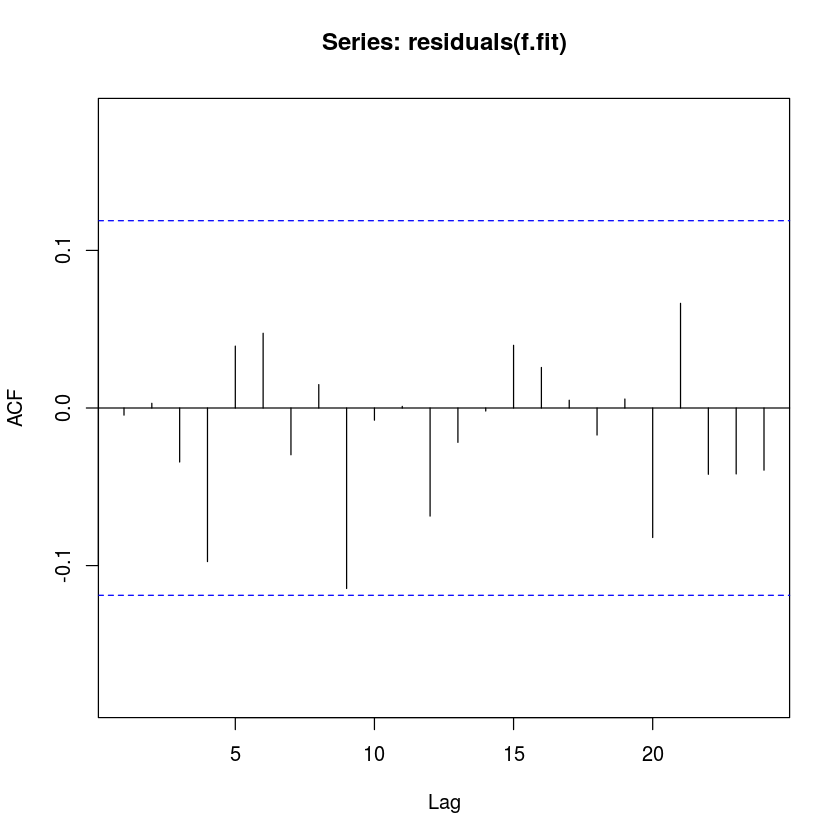

In [7]:
Acf(residuals(f.fit))
Box.test(residuals(f.fit), lag=24, fitdf=4, type="Ljung")

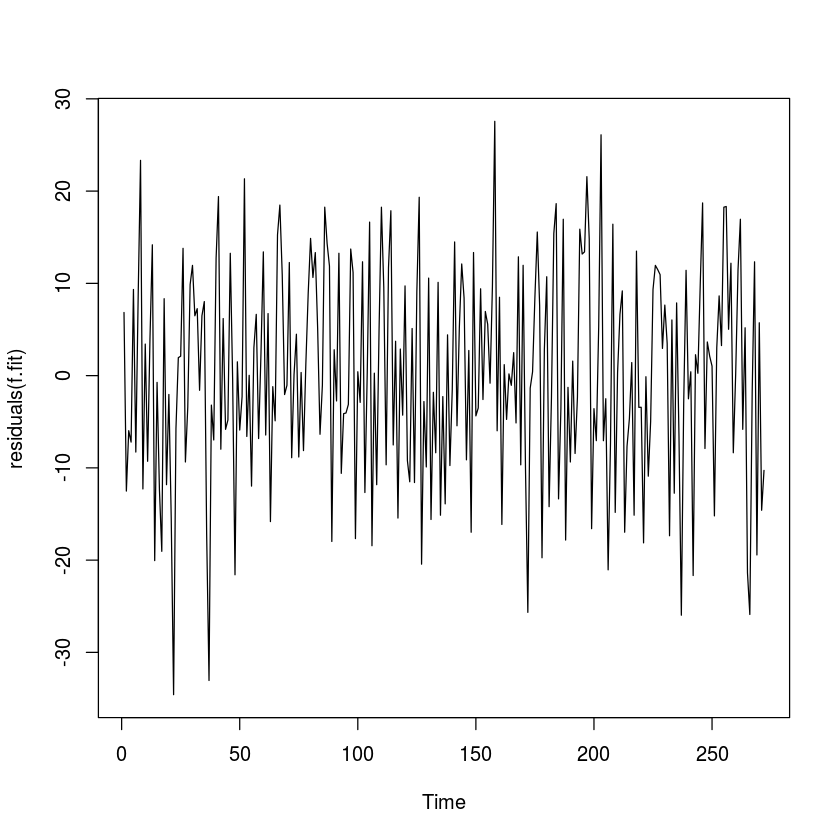

In [8]:
plot(residuals(f.fit))

In [9]:
jj <- JohnsonJohnson
summary(jj)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.440   1.248   3.510   4.800   7.132  16.200 

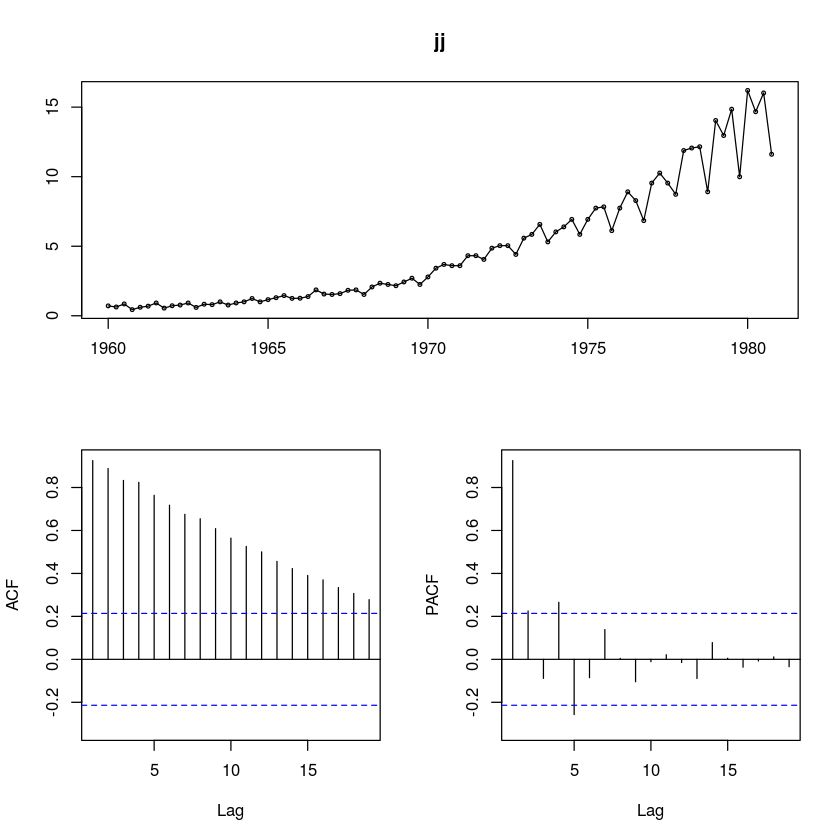

In [10]:
tsdisplay(jj)

In [11]:
ndiffs(jj)


[1] 1

[1] 1

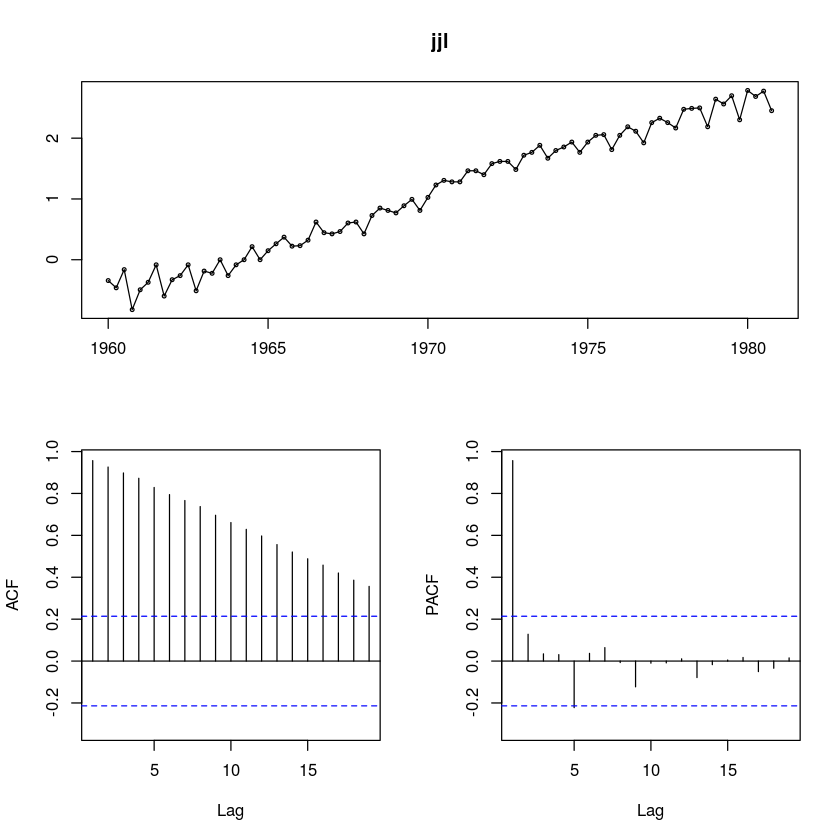

In [28]:
jjl <- log(jj)
ndiffs(jjl)
#jj1 <- diff(jj1)
tsdisplay(jjl)

In [29]:
jj.fit <- auto.arima(jjl)
summary(jj.fit)

Series: jjl 
ARIMA(2,0,0)(1,1,0)[4] with drift         

Coefficients:
         ar1     ar2     sar1   drift
      0.2686  0.2855  -0.2695  0.0382
s.e.  0.1137  0.1214   0.1212  0.0042

sigma^2 estimated as 0.007403:  log likelihood=82.47
AIC=-154.95   AICc=-154.14   BIC=-143.04

Training set error measures:
                      ME       RMSE        MAE MPE MAPE      MASE        ACF1
Training set 0.002030107 0.08396647 0.06504478 NaN  Inf 0.4058742 -0.03591258


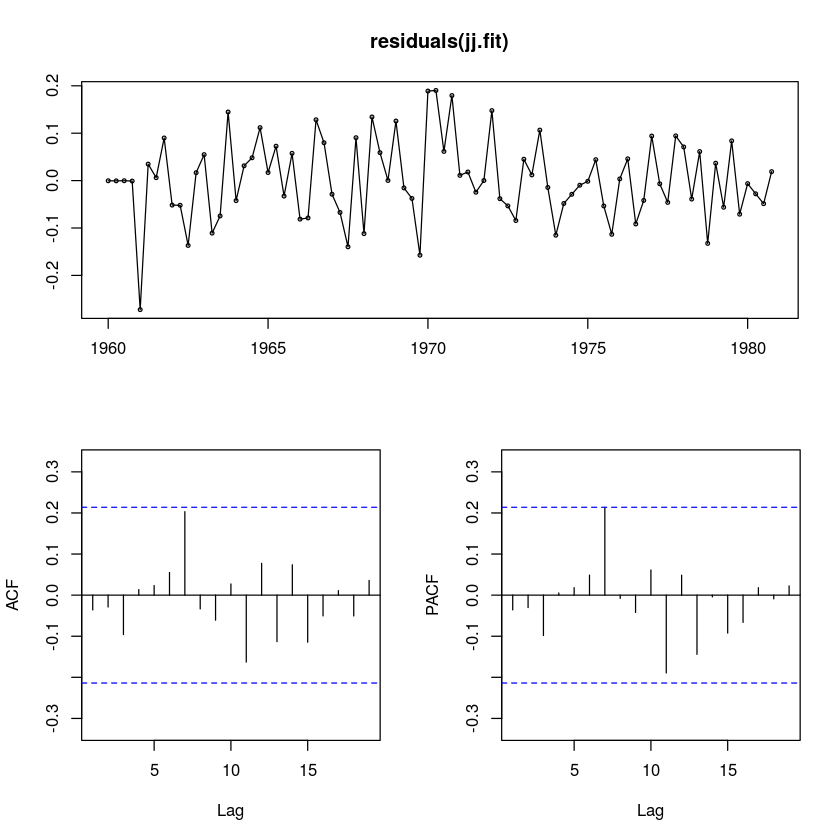

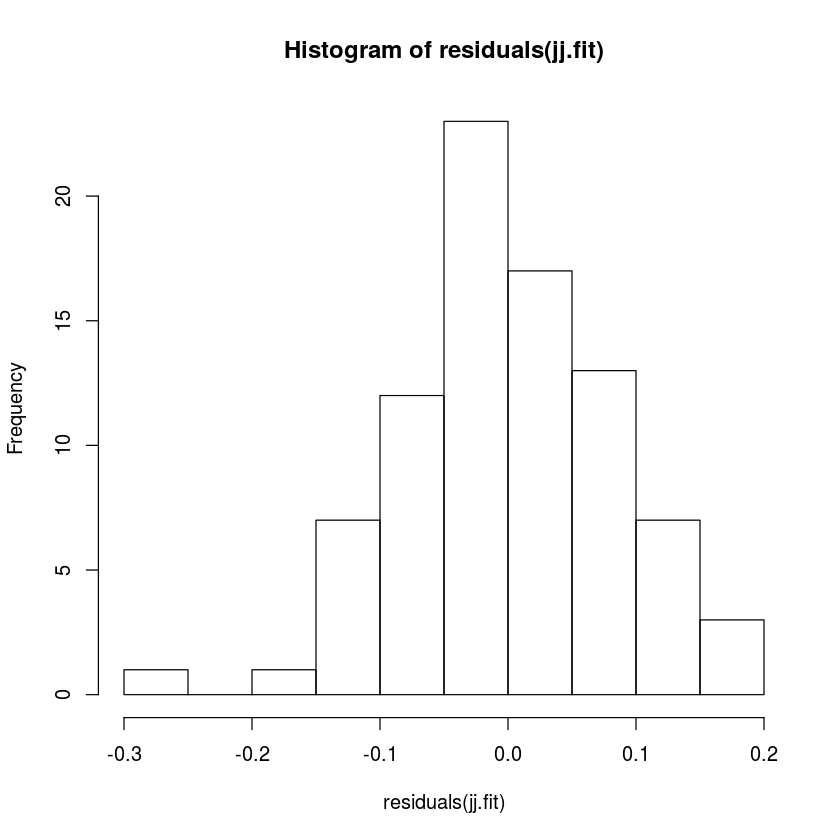

In [30]:
tsdisplay(residuals(jj.fit))
hist(residuals(jj.fit))


	Box-Ljung test

data:  residuals(jj.fit)
X-squared = 17.839, df = 20, p-value = 0.598


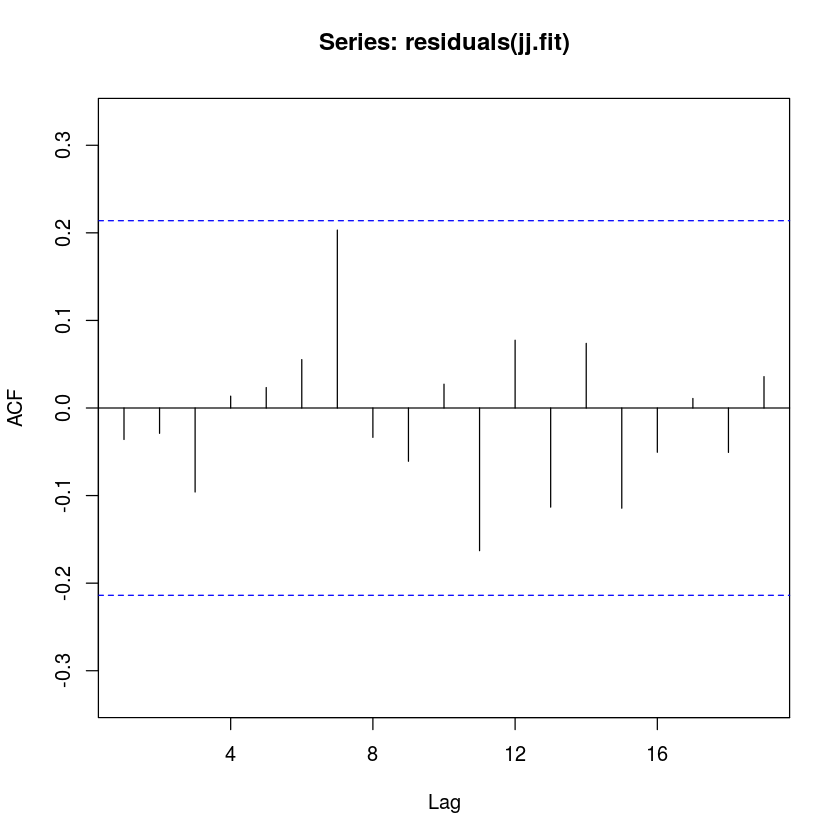

In [15]:
Acf(residuals(jj.fit))
Box.test(residuals(jj.fit), lag=24, fitdf=4, type="Ljung")

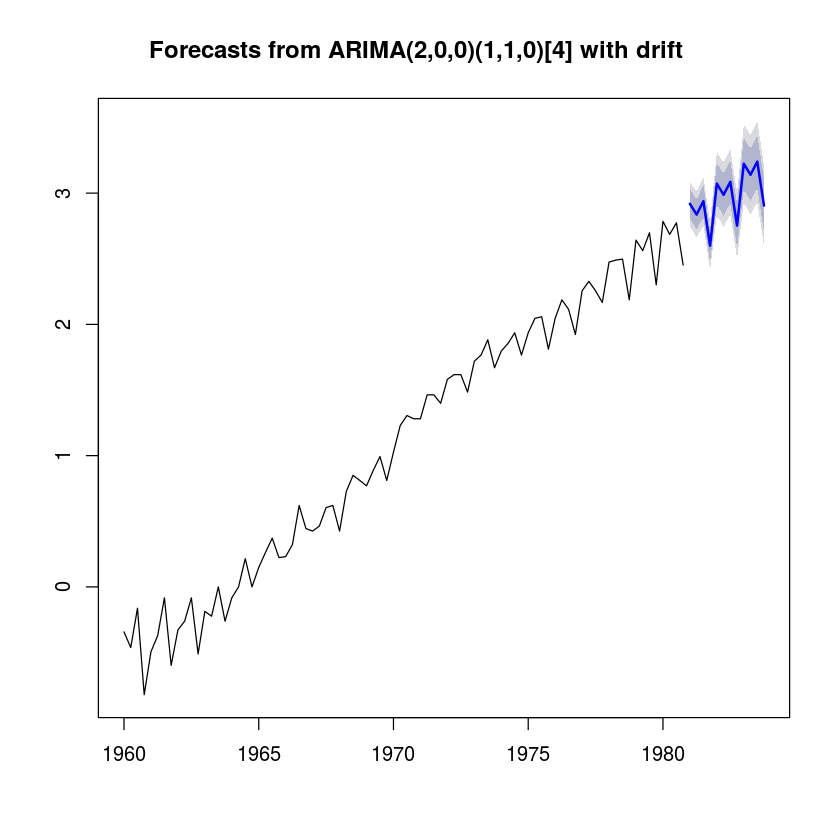

In [39]:
jj.forecast <- forecast.Arima(jj.fit, h=12)
plot(jj.forecast)

In [17]:
ssm <- sunspot.month

[1] 1

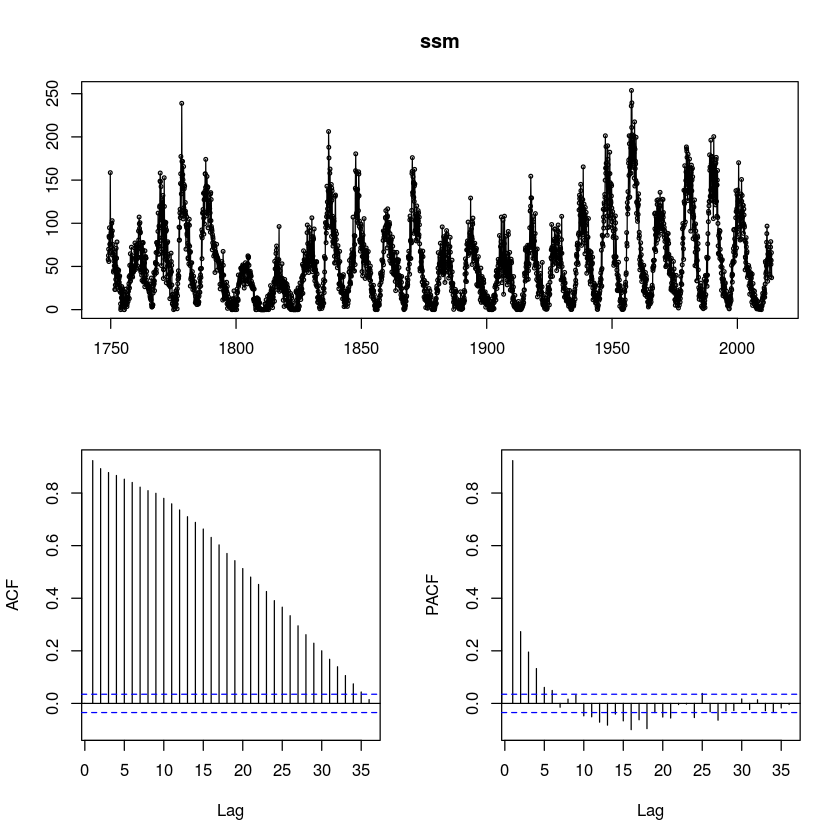

In [18]:
ndiffs(ssm)
tsdisplay(ssm)

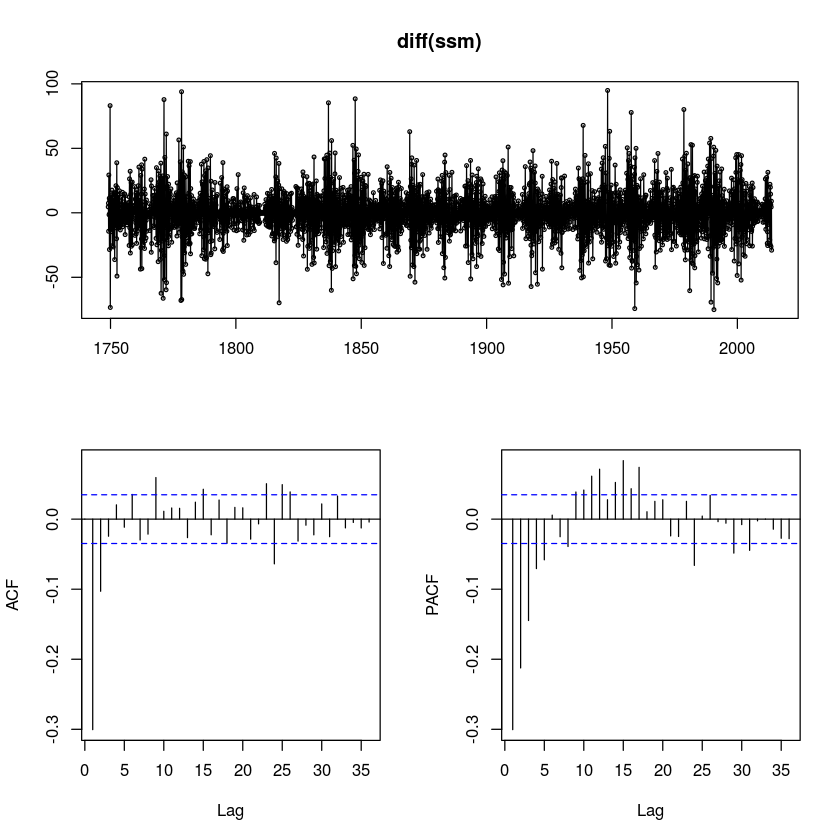

In [19]:
tsdisplay(diff(ssm))
ssm1 <- diff(ssm)
ssm2 <- diff(diff(ssm))

In [25]:
ssm.fit <- auto.arima(ssm)
summary(ssm.fit)

Series: ssm 
ARIMA(2,1,2)                    

Coefficients:
         ar1      ar2      ma1     ma2
      1.3307  -0.3807  -1.7582  0.7979
s.e.  0.0289   0.0272   0.0198  0.0186

sigma^2 estimated as 246.3:  log likelihood=-13251.08
AIC=26512.17   AICc=26512.19   BIC=26542.48

Training set error measures:
                       ME     RMSE      MAE MPE MAPE     MASE         ACF1
Training set -0.008045292 15.69049 11.12069 NaN  Inf 0.474038 -0.007152774


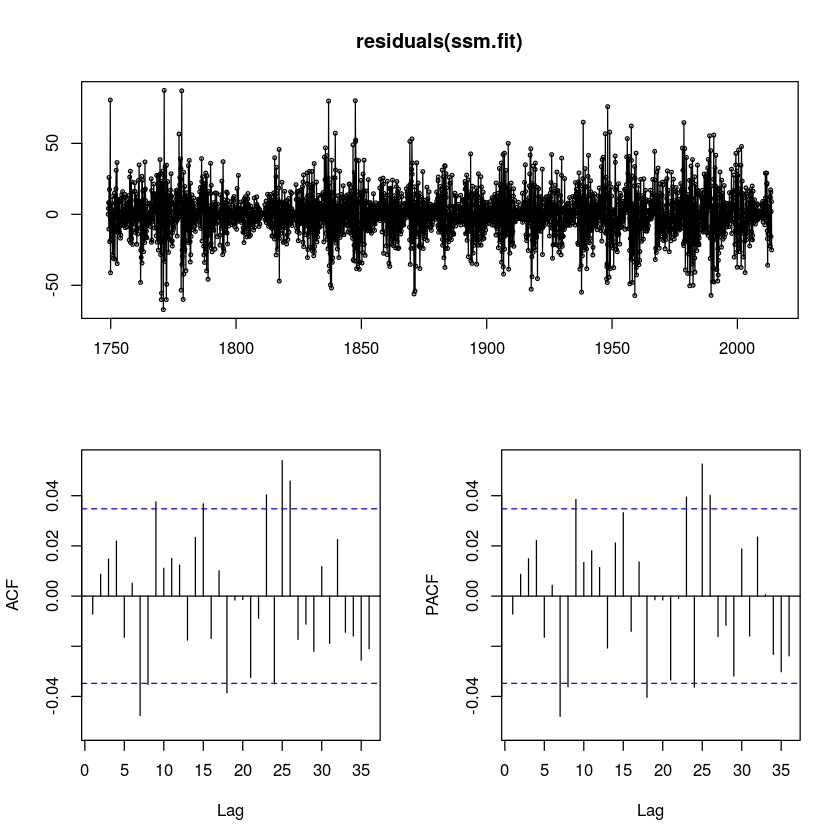

In [31]:
tsdisplay(residuals(ssm.fit))

In [32]:
#ssm.fit2 <- auto.arima(ssm2)
#summary(ssm.fit2)


	Box-Ljung test

data:  residuals(ssm.fit)
X-squared = 46.632, df = 24, p-value = 0.003714


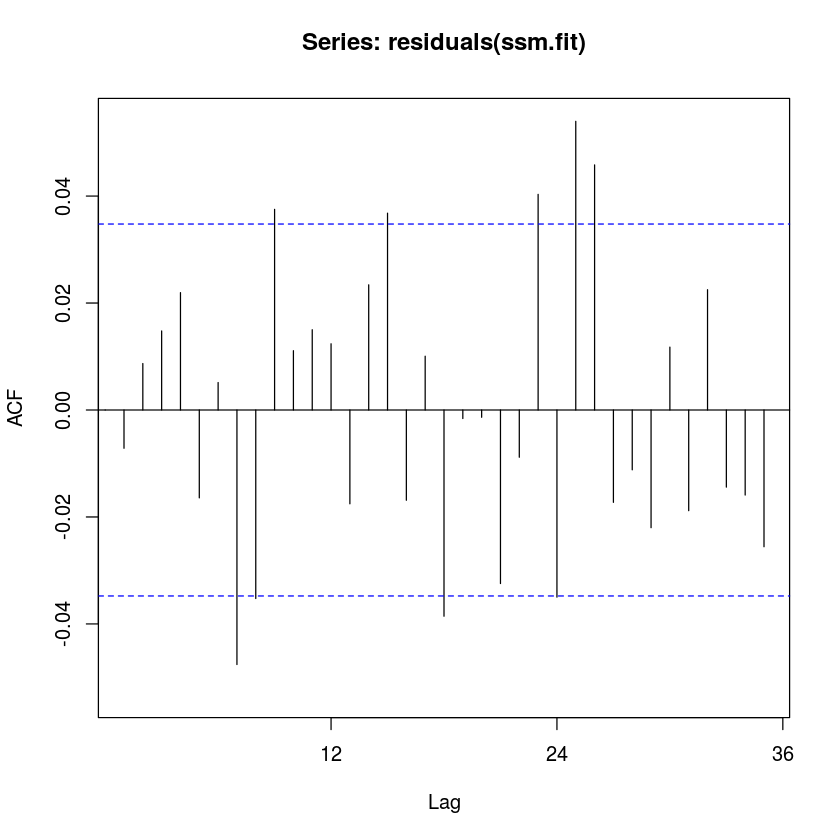

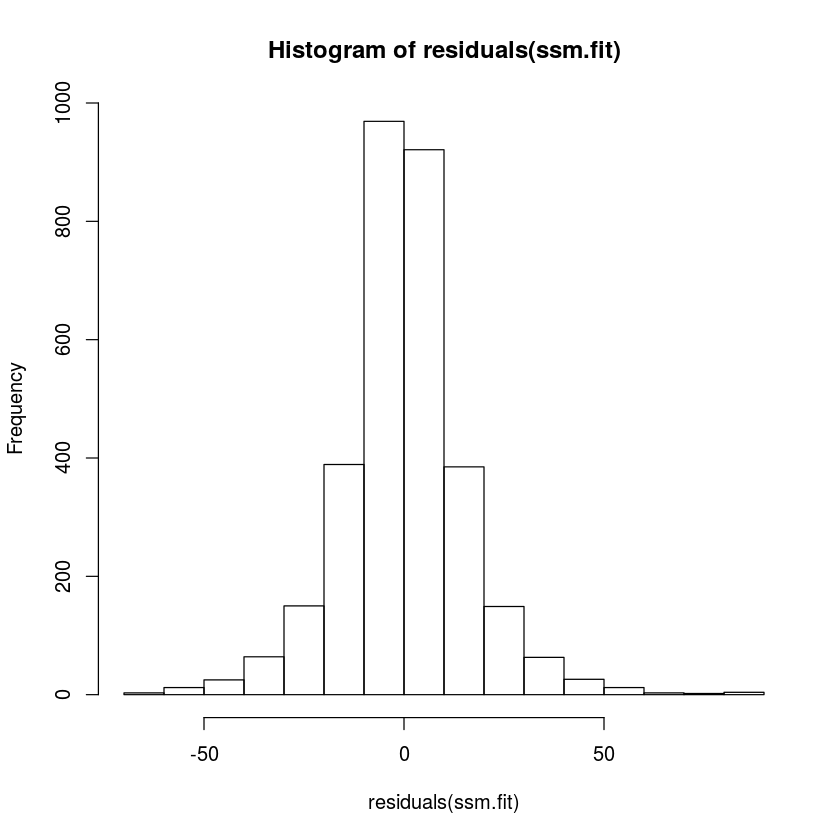

In [36]:
Acf(residuals(ssm.fit))
Box.test(residuals(ssm.fit), lag=24, type="Ljung")
hist(residuals(ssm.fit))

In [35]:
#Acf(residuals(ssm.fit2))
#Box.test(residuals(ssm.fit2), lag=24, fitdf=6, type="Ljung")
#hist(residuals(ssm.fit))

When should an ARIMA(p,d,q) model in wihch d > 0 be considered instead of an ARMA(p,q) model?

Differencing is used to remove trends in the data; usually d = 1 for most simple models.  Differencing greater than 1 can be needed when there are complex non-linear trends in the data.